In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
def preprocess_dataset1(dataset):
    categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan']
    encoder = LabelEncoder()
    for col in categorical_columns:
        dataset[col] = encoder.fit_transform(dataset[col].astype(str))
    numerical_columns = ['Age', 'No of Dependents', 'Total Salary', 'Price']
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset[numerical_columns])
    return scaled_data

In [3]:
def find_optimal_clusters(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

In [4]:
def plot_elbow(distortions, max_k, dataset_name):
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title(f'Elbow Method for {dataset_name}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

In [5]:
def find_optimal_clusters(data, max_k=6, max_iter=100):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=max_iter)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

In [8]:
file1_path = 'behavioural_dataset.csv'
dataset1 = pd.read_csv(file1_path)

In [9]:
processed_data1 = preprocess_dataset1(dataset1)

In [10]:
distortions1 = find_optimal_clusters(processed_data1, max_k=10)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

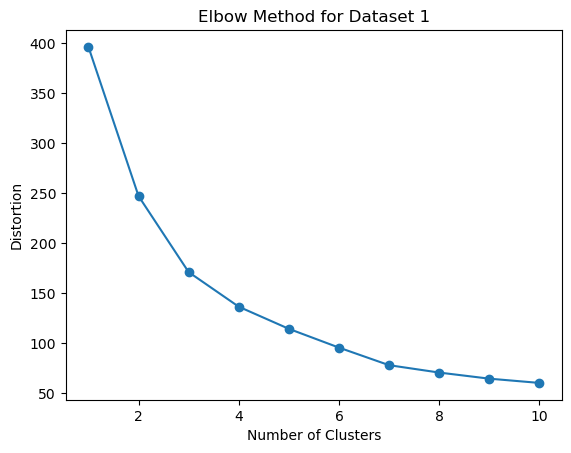

In [11]:
plot_elbow(distortions1, 10, "Dataset 1")

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


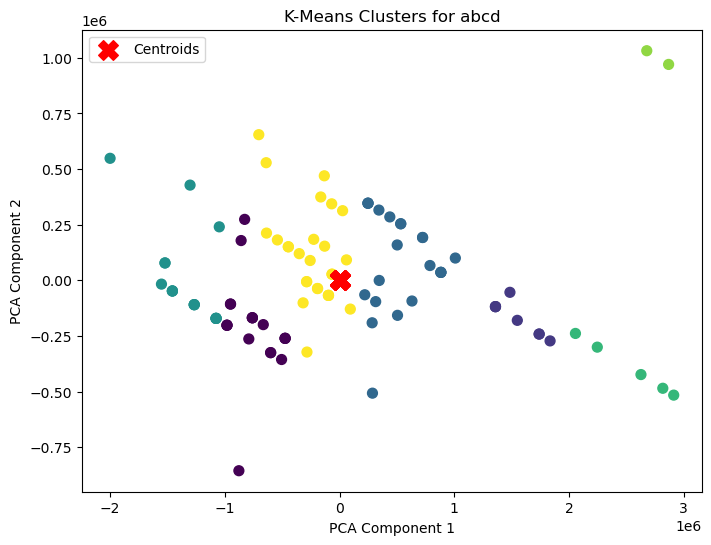

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def cluster_and_plot(data, n_clusters, dataset_name):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)

    # Reduce dimensions to 2 using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clusters for {dataset_name}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()
cluster_and_plot(dataset1, 7, "abcd")